In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.shape


(1000, 8)

In [6]:
#df.drop_duplicates() based on all cols
#df.drop_duplicates(subset = ['brand'])
duplicateRows=df[df.duplicated()]
duplicateRows.sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: object

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
print(df['gender'].unique)
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())


<bound method Series.unique of 0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object>
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical_features : {}'.format(len(numeric_features),numeric_features))
print('We have {} categorical : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical_features : ['math_score', 'reading_score', 'writing_score']
We have 5 categorical : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [11]:
df['total_score'] =  df['math_score']+df['reading_score']+df['writing_score']
df['average']= df['total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [20]:
reading_score_full =df[df['reading_score']== 100]['total_score'].count()
print(reading_score_full)
writing_score_full = df[df['writing_score']== 100]['total_score'].count()
print(writing_score_full)
math_score_full = df[df['math_score']== 100]['total_score'].count()
print(math_score_full)



17
14
7


In [25]:
highest_average_row  = df[df['average']==df['average'].max()]
highest_average_row

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.0
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.0
962,female,group E,associate's degree,standard,none,100,100,100,300,100.0


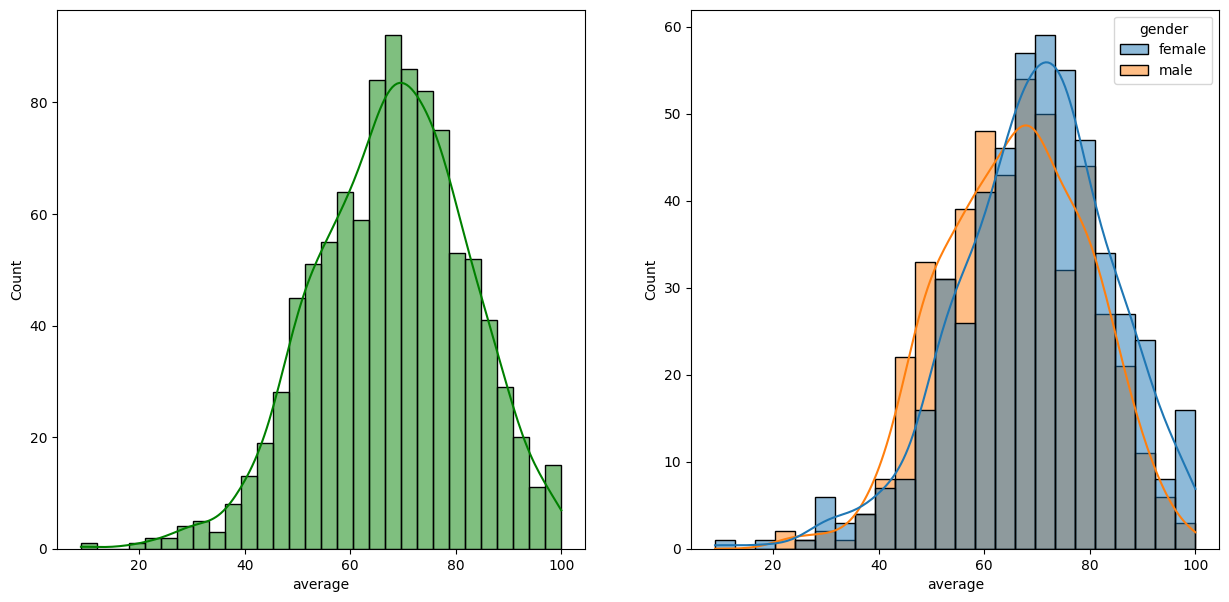

In [27]:
fig,axs = plt.subplots(2,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins = 30,kde='True',color= 'g')
plt.subplot(122)
sns.histplot(data= df, x='average',kde='True',hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

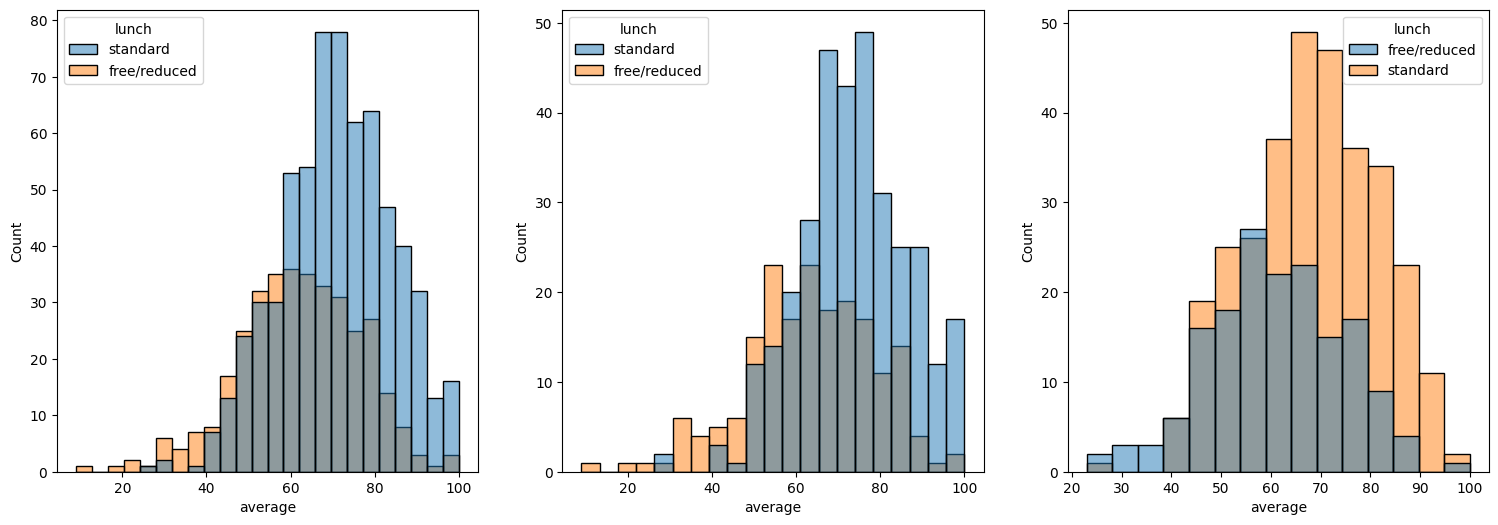

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data= df,x='average',hue='lunch')
plt.subplot(142)
sns.histplot(data= df[df['gender']=='female'],x='average',hue='lunch')
plt.subplot(143)
sns.histplot(data= df[df['gender']=='male'],x='average',hue='lunch')


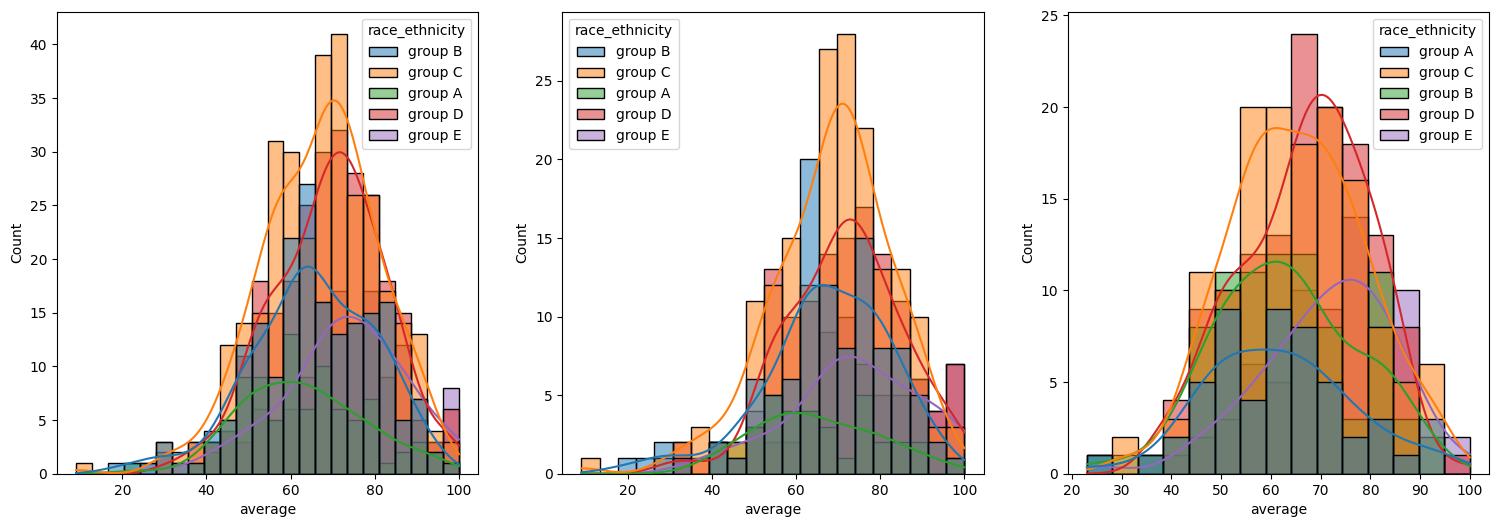

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

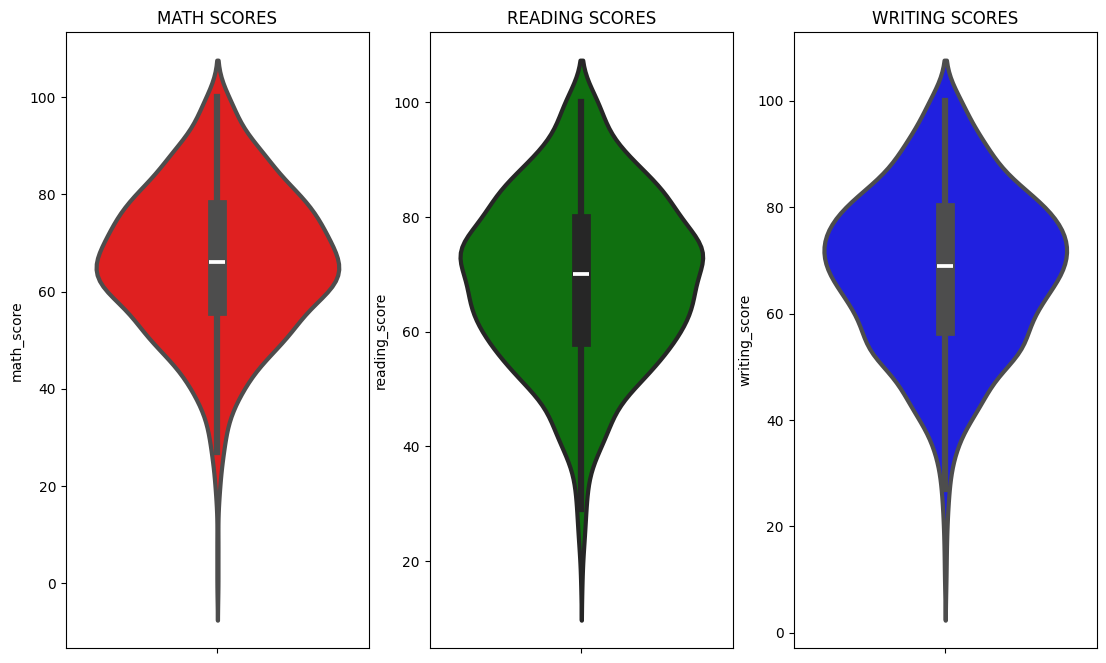

In [35]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [ ]:
#multivariate analysis using pieplot
